## Statistical Modeling, Part 1: Linear Regression

In this exercise, you'll get a chance to practice building and analyzing linear models using the data from the UN exercise.

In [63]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

You'll be working with the combined gdp and life expectancy data.

In [64]:
gdp_le = pd.read_csv('../data/gdp_le.csv').dropna()

In [65]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377
...,...,...,...,...,...
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749


### Part 1: Analyzing 2019

For this part, we'll look at our dataset just for the year 2019.

In [66]:
gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019].copy()

Fit a linear regression model on the 2019 data with target variable life expenctancy and predictor variable GDP per capita.

In [67]:
lm = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     166.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           8.13e-27
Time:                        20:26:05   Log-Likelihood:                -513.64
No. Observations:                 167   AIC:                             1031.
Df Residuals:                     165   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9940      0.566    120.197      0.000      66.877      69.111
GDP_Per_Capita     0.0002   1.79e-05     12.915      0.000       0.000       0.000
==============================================================================
Omnibus:                       20.455   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.319
Skew:                          -0.923   Prob(JB):                     5.24e-06
Kurtosis:                       3.295   Cond. No.                     4.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question:** How can we interpret the meaning of the coefficient for GDP_Per_Capita?

**Answer**
The low coefficient for GDP_Per_Capita (0.0002) implies that changes in GDP_Per_Capita have a relatively small impact on average life expectancy.
Mean life expectancy only increases by 0.0002 for every $1 GDP per capita increase.
Life_Expectancy = 0.0002*GDP_Per_Capita + 67.9940

It might make it easier to interpret if we changed the units on GDP_Per_Capita since a one unit change in GDP per capita does not have a very large impact at all on GDP_Per_Capita.

Fit a new model, but this time use thousands of dollars of GDP_Per_Capita as your predictor variable.

**Hint:** Two ways that you can accomplish this are by creating a new column in your DataFrame or by making use of `I()` in your formula.

In [68]:
lm = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     166.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           8.13e-27
Time:                        20:26:05   Log-Likelihood:                -513.64
No. Observations:                 167   AIC:                             1031.
Df Residuals:                     165   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   67.9940      0.566    120.197      0.000      66.877      69.111
I(GDP_Per_Capita / 1000)     0.2307      0.018     12.915      0.000       0.195       0.266
==============================================================================
Omnibus:                       20.455   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.319
Skew:                          -0.923   Prob(JB):                     5.24e-06
Kurtosis:                       3.295   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:** How do we interpret the meaning of the coefficients for the new model?

**Answer**
mean(life_expectancy) = 0.2307*(GDP per Capita in thousands) + 67.9940
Every thousand dollar increase in GDP/Capita increases mean life_expectancy by 0.2307.

Now, let's plot the fitted values against the original data.

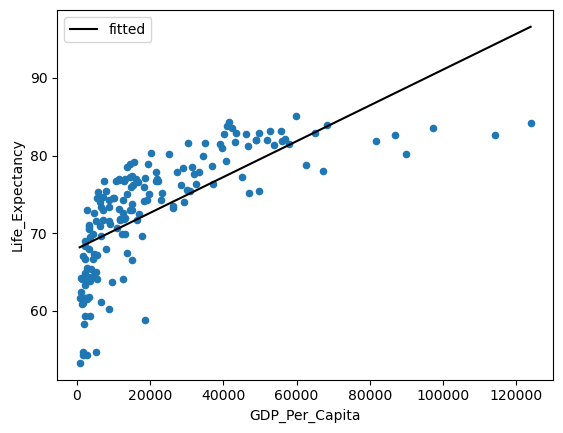

In [69]:
ax = gdp_le_2019.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

**Question:** What potential problems do you see with this fit?

**Answer**
The linear fit isn't appropriate here because there clearly isn't a linear relationship between GDP_Per_Capita and Life_Expectancy.
This is why a log transformation is used later.

You saw from the guided exploration portion of the project that using the logarithm of the GDP resulted in a larger correlation value. 

Fit a new model using the log of GDP Per Capita as a predictor variable.

**Hint:** You can do this by using `'Life_Expectancy ~ np.log(GDP_Per_Capita)'` as your formula.

In [70]:
lm = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     424.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.82e-47
Time:                        20:26:05   Log-Likelihood:                -465.69
No. Observations:                 167   AIC:                             935.4
Df Residuals:                     165   BIC:                             941.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 21.7086      2.512      8.643      0.000      16.749      26.668
np.log(GDP_Per_Capita)     5.4472      0.264     20.596      0.000       4.925       5.969
==============================================================================
Omnibus:                       33.242   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.032
Skew:                          -1.028   Prob(JB):                     3.05e-12
Kurtosis:                       4.843   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Difficult Question:** How do we interpret the meaning of the coefficient for log(GDP_Per_Capita)?

**Answer**
mean(Life_Expectancy) = 5.4472*log(GDP_Per_Capita) + 21.7086
This means that for every 1% increase in GDP_Per_Capita, Life_Expectancy increases by ~0.054472/ln(10) = ~0.054472/2.3 = ~0.024.

If GDP_Per_Capita were natural log transformed, life expectancy would increase by 0.054472 for every 1% increase in GDP_Per_Capita. However, this model is base 10 log transformed, meaning the increase in life expectancy must be divided by ln(10).

********It is important to note here that for y = log<sub>base</sub>(x), $dy/dx = 1/(x*ln(base))$ or $dy = dx/(x*ln(base)$ <br>
********This means that for y = ln(x), $dy/dx = 1/x$ or $dy = dx/x$ <br>
********However, for y=log<sub>10</sub>(x), $dy/dx = 1/(x*ln(10))$ or $dy = dx/(x*ln(10))$

Let's look at the plot of our fitted vales agains the data.

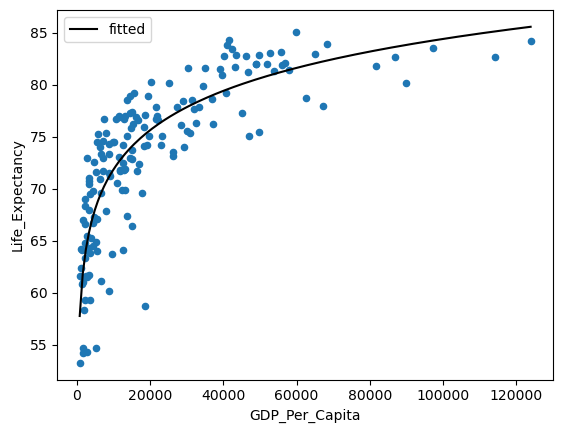

In [71]:
ax = gdp_le_2019.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

We can also look on the log scale.

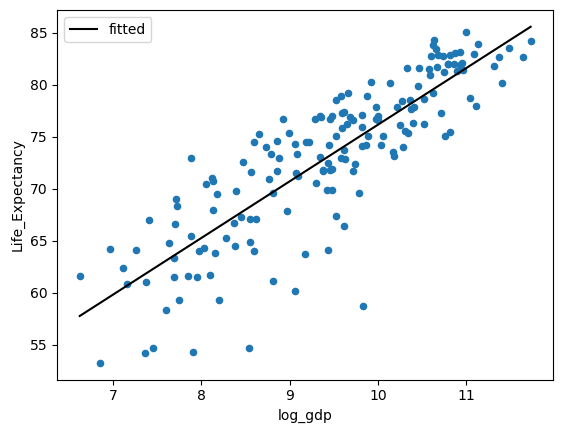

In [72]:
gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])

ax = gdp_le_2019.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

## Part 2: Life Expectancy Over Time

Now, let's explore the relationship between health and wealth over time.

First, using all data in gdp_le, fit a model for life expectancy based on number of years since 1990. (Hint: make use of I()) to help with this.

In [105]:
lm = smf.ols('Life_Expectancy ~ I(Year-1990)', data = gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     358.7
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.86e-77
Time:                        20:59:33   Log-Likelihood:                -17994.
No. Observations:                4922   AIC:                         3.599e+04
Df Residuals:                    4920   BIC:                         3.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.4573      0.267    241.860      0.000      63.935      64.980
I(Year - 1990)     0.2953      0.016     18.939      0.000       0.265       0.326
==============================================================================
Omnibus:                      443.591   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.393
Skew:                          -0.837   Prob(JB):                    1.87e-125
Kurtosis:                       3.004   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** How can you interpret the meaning of both of the coefficients of this model?

**Answer**
Life_Expectancy = 0.2953*(Year-1990)+64.4573
Mean Life_Expectancy increases by 0.2953 for every year, and in 1990, the mean life expectancy predicted by the model is 64.4573.

We can compare the fit model to the data.

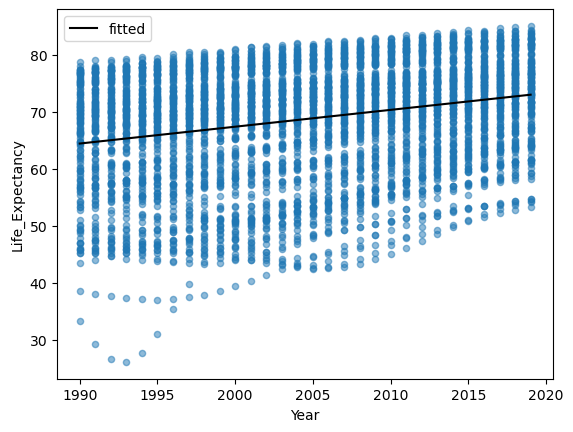

In [106]:
ax = gdp_le.plot(kind = 'scatter', x = 'Year', y = 'Life_Expectancy', alpha = 0.5)

fit_df = pd.DataFrame({
    'Year': np.linspace(
        start = gdp_le['Year'].min(),
        stop = gdp_le['Year'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could do better if we include continent in our model. Fit a model which includes a term for Continent. (Don't include any interactions yet).

In [123]:
lm_continent = smf.ols('Life_Expectancy ~ I(Year-1990)+Continent', data = gdp_le).fit()
lm_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1332.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:26:59   Log-Likelihood:                -15791.
No. Observations:                4922   AIC:                         3.160e+04
Df Residuals:                    4915   BIC:                         3.164e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     53.0815      0.221    239.892      0.000      52.648      53.515
Continent[T.Asia]             13.2758      0.244     54.437      0.000      12.798      13.754
Continent[T.Europe]           18.6185      0.238     78.315      0.000      18.152      19.085
Continent[T.North America]    15.9228      0.287     55.560      0.000      15.361      16.485
Continent[T.Oceania]          12.4150      0.398     31.195      0.000      11.635      13.195
Continent[T.South America]    14.5785      0.369     39.507      0.000      13.855      15.302
I(Year - 1990)                 0.2883      0.010     28.901      0.000       0.269       0.308
==============================================================================
Omnibus:                       68.182   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.460
Skew:                           0.154   Prob(JB):                     1.53e-22
Kurtosis:                       3.629   Cond. No.                         98.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:**

1. Is including a term for continent statistically significant?
    Yes, the p value is less the .05 (@0.0)
    
2. How do you interpret the meaning of the model coefficients?
    In this case, Africa is being used as a reference for the categorical variable 'Continent. This means that the y-intercept coefficient for this model shows that Africa's average life expectancy in 1990 is 53.0815.
    Each continent coefficient shows how the intercept increases with each different continent that isn't Africa (i.e. Mean Life Expectancy predicted by the model in Asia in 1990 is 53.0815+13.2758 = 66.3573
    Keeping continent constant, average life expectancy is predicted by the model to increase by 0.2883 for every 1 year after 1990.
    
3. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?
    Because there is no interaction term, this model predcits that life expectancy increases by the same amount per year independent of which continent a country is in.
    However, the model predicts different starting life expectancies in 1990 based on the continent a country is in - European countries have higher life expectancy than Asian countries, which have higher life expectancy than African countries in 1990.
    
    In Africa: Life_Expectancy = 0.2883*(Year-1990)+ 53.0815
    In Asia: Life_Expectancy = 0.2883*(Year-1990)+ (53.0815+13.2758)
    In Europe: Life_Expectancy = 0.2883*(Year-1990)+ (53.0815+18.6185)

In [121]:
sm.stats.anova_lm(lm,lm_continent)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,4920.0,431569.848950,0.0,NaN,NaN,NaN
1,4915.0,176355.860946,5.0,255213.988004,1422.551816,0.0


Adjust the `continent` variable below to see the fitted vs. actual values by continent. What do you notice?

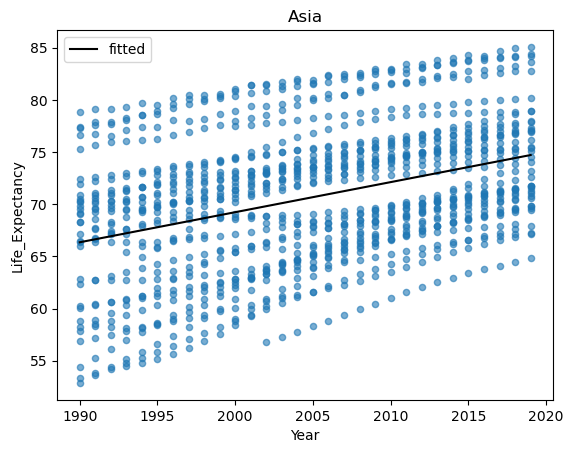

In [109]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                                  stop = sub_df['Year'].max()
                                 ),
    'Continent': continent
})
fit_df['fitted'] = lm_continent.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Now, add an interaction term between Continent and Year to your model.

In [110]:
lm_continent_int = smf.ols('Life_Expectancy ~ I(Year-1990)+Continent:I(Year-1990)+Continent', data = gdp_le).fit()
lm_continent_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     743.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:00:12   Log-Likelihood:                -15753.
No. Observations:                4922   AIC:                         3.153e+04
Df Residuals:                    4910   BIC:                         3.161e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    51.1577      0.325    157.566      0.000      50.521      51.794
Continent[T.Asia]                            15.1446      0.484     31.273      0.000      14.195      16.094
Continent[T.Europe]                          21.7611      0.474     45.911      0.000      20.832      22.690
Continent[T.North America]                   19.0486      0.559     34.054      0.000      17.952      20.145
Continent[T.Oceania]                         15.4019      0.773     19.913      0.000      13.886      16.918
Continent[T.South America]                   16.7370      0.716     23.360      0.000      15.332      18.142
I(Year - 1990)                                0.4191      0.019     22.019      0.000       0.382       0.456
Continent[T.Asia]:I(Year - 1990)             -0.1271      0.028     -4.499      0.000      -0.182      -0.072
Continent[T.Europe]:I(Year - 1990)           -0.2119      0.028     -7.670      0.000      -0.266      -0.158
Continent[T.North America]:I(Year - 1990)    -0.2135      0.033     -6.468      0.000      -0.278      -0.149
Continent[T.Oceania]:I(Year - 1990)          -0.2044      0.046     -4.455      0.000      -0.294      -0.114
Continent[T.South America]:I(Year - 1990)    -0.1470      0.042     -3.471      0.001      -0.230      -0.064
==============================================================================
Omnibus:                       89.492   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.415
Skew:                           0.210   Prob(JB):                     1.30e-28
Kurtosis:                       3.671   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:** 
1. Are the interaction terms statistically significant?
    Yes, @ 6.37*10^-15, the p-value from the ANOVA test comparing the model without interaction terms to the model with interaction terms is well below 0.05, which means that the interaction terms are statistically significant.
    
2. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?
    Again, Africa is used as the reference category for both the continent individual predictor and the continent*year interaction term.
    Like before, Africa has a much lower life expectancy in 1990 than countries in the other continents, and Asia has a lower life expectancy in 1990 than Europe.
    However, as shown as the base year coefficient, Africa has the highest life expectancy increase per year in comparison to other continents with a life expectancy increase of 0.4191 per year after 1990. Asia's life expectancy increases at a lower rate of 0.4191-0.1271 = 0.2920 per year. Europe, comparitively, increases its life expectancy at the lowest rate per year - only 0.4191-0.2119 = 0.2072 per year.
    
    In Africa: Life_Expectancy = 0.4191*(Year-1990)+ 51.1577
    In Asia: Life_Expectancy = (0.4191-0.1271)*(Year-1990)+ (51.1577+13.2758)
    In Europe: Life_Expectancy = (0.4191-0.2119)*(Year-1990)+ (51.1577+18.6185) 

In [111]:
sm.stats.anova_lm(lm_continent,lm_continent_int)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,4915.0,176355.860946,0.0,NaN,NaN,NaN
1,4910.0,173655.421080,5.0,2700.439866,15.270655,6.367544e-15


You can uses the code in the next cell to explore the output from the new model.

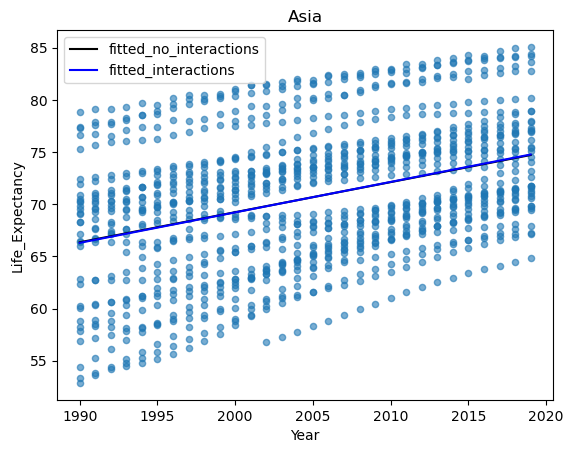

In [112]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                        stop = sub_df['Year'].max()
                       ),
    'Continent': continent
})
fit_df['fitted_no_interactions'] = lm_continent.predict(fit_df)
fit_df['fitted_interactions'] = lm_continent_int.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions')
fit_df.plot(x = 'Year', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

## Part 3: The Effect of Wealth on Health

Now, let's try and uncover the effect of wealth on health, after accounting for the effect of Continent and year.

Fit a model that builds off of your previous model but includes a term for the log of gdp per capita.

In [113]:
lm_gdp = smf.ols('Life_Expectancy ~ I(Year-1990)+Continent:I(Year-1990)+Continent+np.log(GDP_Per_Capita)', data = gdp_le).fit()
lm_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1707.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:00:32   Log-Likelihood:                -14122.
No. Observations:                4922   AIC:                         2.827e+04
Df Residuals:                    4909   BIC:                         2.836e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    16.7209      0.558     29.969      0.000      15.627      17.815
Continent[T.Asia]                            10.5321      0.354     29.728      0.000       9.838      11.227
Continent[T.Europe]                          12.6167      0.366     34.474      0.000      11.899      13.334
Continent[T.North America]                   12.2699      0.414     29.649      0.000      11.459      13.081
Continent[T.Oceania]                         11.3964      0.558     20.406      0.000      10.302      12.491
Continent[T.South America]                   10.9321      0.522     20.963      0.000       9.910      11.954
I(Year - 1990)                                0.3245      0.014     23.622      0.000       0.298       0.351
Continent[T.Asia]:I(Year - 1990)             -0.1627      0.020     -8.016      0.000      -0.202      -0.123
Continent[T.Europe]:I(Year - 1990)           -0.2124      0.020    -10.709      0.000      -0.251      -0.174
Continent[T.North America]:I(Year - 1990)    -0.2041      0.024     -8.612      0.000      -0.251      -0.158
Continent[T.Oceania]:I(Year - 1990)          -0.1610      0.033     -4.887      0.000      -0.226      -0.096
Continent[T.South America]:I(Year - 1990)    -0.1507      0.030     -4.957      0.000      -0.210      -0.091
np.log(GDP_Per_Capita)                        4.4641      0.066     67.934      0.000       4.335       4.593
==============================================================================
Omnibus:                      282.819   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.831
Skew:                          -0.288   Prob(JB):                    2.82e-175
Kurtosis:                       4.894   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** How do we interpret the coefficient of log(gdp)?

**Answer**
Keeping year and continent constant, the log(gdp) coefficient of 4.4641 means that for every 1% increase in GDP_Per_Capita, Life_Expectancy increases by ~0.044641/ln(10) = ~0.044641/2.3 = ~0.019.

In [114]:
gdp_le['log_gdp'] = np.log(gdp_le['GDP_Per_Capita'])

The resulting model looks at gdp vs. life expectancy by continent. You can explore how the fitted values compare to the actual values by adjusting the values for year and continent below.

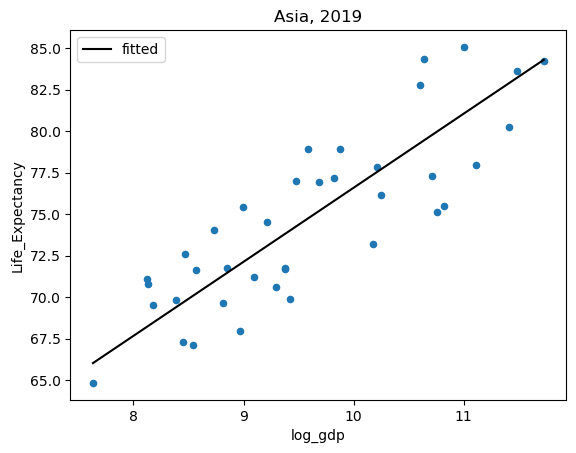

In [115]:
year = 2019
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = f'{continent}, {year}')

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted'] = lm_gdp.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could estimate different effects of gdp per continent. Add an interaction term between continent and gdp.

In [116]:
lm_gdp_cont = smf.ols('Life_Expectancy ~ I(Year-1990)+Continent:(I(Year-1990)+np.log(GDP_Per_Capita))+Continent+np.log(GDP_Per_Capita)', data = gdp_le).fit()
lm_gdp_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1217.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:00:50   Log-Likelihood:                -14101.
No. Observations:                4922   AIC:                         2.824e+04
Df Residuals:                    4904   BIC:                         2.835e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            13.4521      0.998     13.484      0.000      11.496      15.408
Continent[T.Asia]                                    17.0558      1.376     12.392      0.000      14.357      19.754
Continent[T.Europe]                                  15.9496      1.928      8.273      0.000      12.170      19.729
Continent[T.North America]                           17.4784      2.165      8.074      0.000      13.234      21.722
Continent[T.Oceania]                                 11.2043      2.399      4.670      0.000       6.500      15.908
Continent[T.South America]                           -9.3390      6.044     -1.545      0.122     -21.189       2.511
I(Year - 1990)                                        0.3155      0.014     22.745      0.000       0.288       0.343
Continent[T.Asia]:I(Year - 1990)                     -0.1428      0.021     -6.931      0.000      -0.183      -0.102
Continent[T.Europe]:I(Year - 1990)                   -0.2033      0.020    -10.038      0.000      -0.243      -0.164
Continent[T.North America]:I(Year - 1990)            -0.1911      0.024     -7.938      0.000      -0.238      -0.144
Continent[T.Oceania]:I(Year - 1990)                  -0.1566      0.033     -4.741      0.000      -0.221      -0.092
Continent[T.South America]:I(Year - 1990)            -0.1992      0.034     -5.914      0.000      -0.265      -0.133
np.log(GDP_Per_Capita)                                4.8878      0.126     38.863      0.000       4.641       5.134
Continent[T.Asia]:np.log(GDP_Per_Capita)             -0.7958      0.163     -4.870      0.000      -1.116      -0.475
Continent[T.Europe]:np.log(GDP_Per_Capita)           -0.4303      0.209     -2.058      0.040      -0.840      -0.020
Continent[T.North America]:np.log(GDP_Per_Capita)    -0.6338      0.241     -2.635      0.008      -1.105      -0.162
Continent[T.Oceania]:np.log(GDP_Per_Capita)          -0.0218      0.277     -0.079      0.937      -0.565       0.521
Continent[T.South America]:np.log(GDP_Per_Capita)     2.1876      0.671      3.259      0.001       0.872       3.504
==============================================================================
Omnibus:                      331.643   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              903.860
Skew:                          -0.369   Prob(JB):                    5.36e-197
Kurtosis:                       4.965   Cond. No.                     2.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

**Questions:** 
1. Are the new interaction terms statistically significant?
    Yes, from the ANOVA comparing the life expectancy linear model without interaction terms to the one with interaction terms, the p-value = 3.24*10^-8, which is much less than the conventional standard alpha value of 0.05. This means that the null hypothesis that the model predictions are equivalent can be rejected, and the new interaction terms are statistically significant.
    
2. What does the model say about European vs. Asian vs. African countries with respect to the effect of gdp on life expectancy?
    In Africa: Life_Expectancy = 0.3155*(Year-1990)+4.8878*log(GDP_Per_Capita)+13.4521
    In Asia: Life_Expectancy = (0.3155-0.1428)*(Year-1990)+(4.8878-0.7958)*log(GDP_Per_Capita)+(13.4521+17.0558)
    In Europe: Life_Expectancy = (0.3155-0.2033)*(Year-1990)+(4.8878-0.4303)*log(GDP_Per_Capita)+(13.4521+15.9496)
    
    This means that in terms of the magnitude of gdp per capita's effect on life expectancy:
    Africa (coeff 4.8878) > Europe (coeff 4.4575) > Asia (coeff 4.0920). 
    Keep in mind that the model uses log(gdp_per_capita), so each 1% increase in gdp per capita ~= increase of life expectancy of coeff/(100*ln(10)).

In [117]:
sm.stats.anova_lm(lm_gdp,lm_gdp_cont)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,4909.0,89507.666732,0.0,NaN,NaN,NaN
1,4904.0,88721.441122,5.0,786.22561,8.691586,3.242754e-08


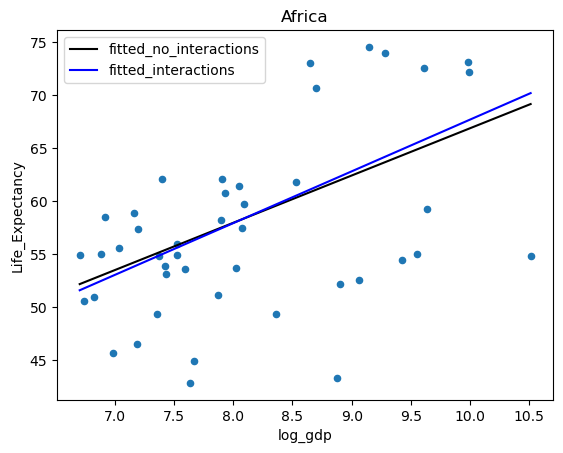

In [118]:
year = 2007
continent = 'Africa'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted_no_interactions'] = lm_gdp.predict(fit_df)
fit_df['fitted_interactions'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions');
fit_df.plot(x = 'log_gdp', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

Finally, add an interaction term between log(gdp) and year.

In [119]:
lm_gdp_cont_year = smf.ols('Life_Expectancy ~ I(Year - 1990) + Continent + Continent:(I(Year - 1990) + np.log(GDP_Per_Capita)) + np.log(GDP_Per_Capita) + np.log(GDP_Per_Capita):I(Year - 1990)', data = gdp_le).fit()
lm_gdp_cont_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1157.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:01:05   Log-Likelihood:                -14087.
No. Observations:                4922   AIC:                         2.821e+04
Df Residuals:                    4903   BIC:                         2.834e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             8.6679      1.359      6.376      0.000       6.003      11.333
Continent[T.Asia]                                    16.7747      1.374     12.210      0.000      14.081      19.468
Continent[T.Europe]                                  15.5436      1.924      8.077      0.000      11.771      19.316
Continent[T.North America]                           16.6162      2.166      7.673      0.000      12.371      20.862
Continent[T.Oceania]                                 10.6750      2.395      4.457      0.000       5.979      15.371
Continent[T.South America]                           -9.7850      6.029     -1.623      0.105     -21.605       2.035
I(Year - 1990)                                        0.6366      0.064      9.994      0.000       0.512       0.761
Continent[T.Asia]:I(Year - 1990)                     -0.0945      0.023     -4.184      0.000      -0.139      -0.050
Continent[T.Europe]:I(Year - 1990)                   -0.1178      0.026     -4.510      0.000      -0.169      -0.067
Continent[T.North America]:I(Year - 1990)            -0.1326      0.027     -4.995      0.000      -0.185      -0.081
Continent[T.Oceania]:I(Year - 1990)                  -0.1261      0.033     -3.765      0.000      -0.192      -0.060
Continent[T.South America]:I(Year - 1990)            -0.1454      0.035     -4.131      0.000      -0.214      -0.076
np.log(GDP_Per_Capita)                                5.4930      0.172     32.000      0.000       5.156       5.830
Continent[T.Asia]:np.log(GDP_Per_Capita)             -0.8423      0.163     -5.160      0.000      -1.162      -0.522
Continent[T.Europe]:np.log(GDP_Per_Capita)           -0.5182      0.209     -2.476      0.013      -0.928      -0.108
Continent[T.North America]:np.log(GDP_Per_Capita)    -0.6368      0.240     -2.654      0.008      -1.107      -0.166
Continent[T.Oceania]:np.log(GDP_Per_Capita)          -0.0174      0.276     -0.063      0.950      -0.559       0.524
Continent[T.South America]:np.log(GDP_Per_Capita)     2.1486      0.670      3.209      0.001       0.836       3.461
np.log(GDP_Per_Capita):I(Year - 1990)                -0.0401      0.008     -5.165      0.000      -0.055      -0.025
==============================================================================
Omnibus:                      316.970   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              834.296
Skew:                          -0.362   Prob(JB):                    6.84e-182
Kurtosis:                       4.883   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] S

**Question:** How do we interpret the new interaction term?

**Answer**
Keeping continent constant, the new interaction term shows that log(GDP_Per Capita) * (# of years after 1990) decreases the average predicted life expectancy by 0.0401 years.

Another way of seeing this is that for every 1% increase in GDP per capita, life expectancy decreases by:
(# of years after 1990)*0.000401/ln(10)

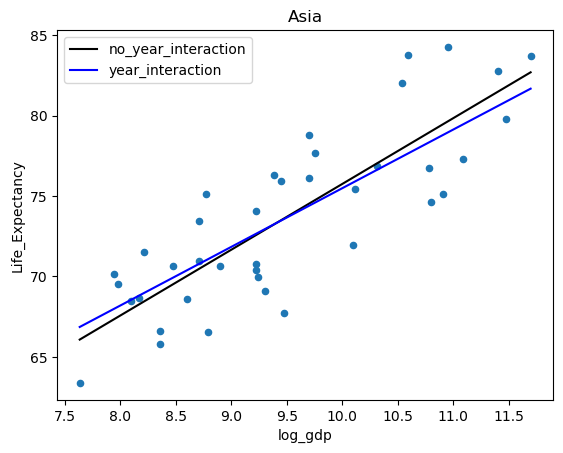

In [120]:
year = 2015
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['year_interaction'] = lm_gdp_cont_year.predict(fit_df)
fit_df['no_year_interaction'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'no_year_interaction', ax = ax, color = 'black', label = 'no_year_interaction');
fit_df.plot(x = 'log_gdp', y = 'year_interaction', ax = ax, color = 'blue', label = 'year_interaction');